 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8889/notebooks/notebooks/Hindcast_201905/SpinningUp.ipynb#Set-up" data-toc-modified-id="Set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set-up</a></span><ul class="toc-item"><li><span><a href="http://localhost:8889/notebooks/notebooks/Hindcast_201905/SpinningUp.ipynb#Month" data-toc-modified-id="Month-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Month</a></span></li></ul></li><li><span><a href="http://localhost:8889/notebooks/notebooks/Hindcast_201905/SpinningUp.ipynb#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="http://localhost:8889/notebooks/notebooks/Hindcast_201905/SpinningUp.ipynb#Surface-Plots" data-toc-modified-id="Surface-Plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Surface Plots</a></span></li><li><span><a href="http://localhost:8889/notebooks/notebooks/Hindcast_201905/SpinningUp.ipynb#Profiles" data-toc-modified-id="Profiles-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Profiles</a></span></li><li><span><a href="http://localhost:8889/notebooks/notebooks/Hindcast_201905/SpinningUp.ipynb#Thalwegs" data-toc-modified-id="Thalwegs-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Thalwegs</a></span></li><li><span><a href="http://localhost:8889/notebooks/notebooks/Hindcast_201905/SpinningUp.ipynb#redo-DIC/Alkalinity-Plots" data-toc-modified-id="redo-DIC/Alkalinity-Plots-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>redo DIC/Alkalinity Plots</a></span></li></ul></div>

In [2]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from sklearn.metrics import mean_squared_error
import xarray as xr
import yaml

from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

%matplotlib inline

# Set-up

In [3]:
#mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
#bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/Users/sallen/Documents/MEOPAR/grid/mesh_mask201702.nc')
bathy = nc.Dataset('/Users/sallen/Documents/MEOPAR/grid/bathymetry_201702.nc')
tmask = mesh['tmask']
deptht = mesh['gdept_1d'][0]
print (deptht.shape)

(40,)


## Month

In [144]:
month = 'oct'
imonth = '10'

In [5]:
year_comp = '2018'

In [6]:
lead = '/Users/sallen/Documents/MEOPAR/Results/'
thalweg_file='/Users/sallen/Documents/MEOPAR/Tools/bathymetry/thalweg_working.txt'
# lead = '/results/SalishSea/averages/'
# thalweg_file='/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'

# Functions

In [ ]:
def surface_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, twoD=False):
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))

    dm = xr.open_dataset(lead+'nowcast-green.201812/SalishSea_'+month+'_climate_2015_2019_'+file+'_T.nc')
    if twoD:
        mean_field = np.ma.array(dm[tracer][0], mask=1-tmask[0, 0])
    else:
        mean_field = np.ma.array(dm[tracer][0, 0], mask=1-tmask[0, 0])
    colours = axs[0, 0].pcolormesh(mean_field, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0, 0].set_title('Nowcast Climatology')
    fig.colorbar(colours, ax=axs[0, 0])

    ym = year_comp + imonth
    ix = 1
    ds = xr.open_dataset(lead+'nowcast-green.201812/SalishSea_1m_'+ym+'_'+ym+'_'+file+'_T.nc')
    if twoD:
        field = np.ma.array(ds[tracer][0], mask=1-tmask[0,0])
    else:
        field = np.ma.array(ds[tracer][0, 0], mask=1-tmask[0,0])
    colours = axs[0, ix].pcolormesh(field, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0, ix].set_title("v201812 "+year_comp)
    fig.colorbar(colours, ax=axs[0, ix])
    
    colours = axs[1, ix].pcolormesh(field-mean_field, cmap=cdiff, vmax=dvmax, vmin=-dvmax)
    fig.colorbar(colours, ax=axs[1, ix])
    ds.close()

    year = '2013'
    ix = 2
    ym = year + imonth
    dn = xr.open_dataset(lead+'spinup.201905/SalishSea_1m_'+ym+'_'+ym+'_'+file+'_T.nc')
    if twoD:
        field = np.ma.array(dn[tracer][0], mask=1-tmask[0,0])
    else:
        field = np.ma.array(dn[tracer][0, 0], mask=1-tmask[0,0])
    colours = axs[0, ix].pcolormesh(field, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0, ix].set_title('Spin-up Yr 1 '+year)
    fig.colorbar(colours, ax=axs[0, ix])
    
    colours = axs[1, ix].pcolormesh(field-mean_field, cmap=cdiff, vmax=dvmax, vmin=-dvmax)
    fig.colorbar(colours, ax=axs[1, ix])
    axs[1, ix].set_title('Spin-up Yr 1 versus Climatology')
    
    dn2 = xr.open_dataset(lead+'spinup.201905.yr2/SalishSea_1m_'+ym+'_'+ym+'_'+file+'_T.nc')
    if twoD:
        field2 = np.ma.array(dn2[tracer][0], mask=1-tmask[0,0])
    else:
        field2 = np.ma.array(dn2[tracer][0, 0], mask=1-tmask[0,0])
    colours = axs[0, -1].pcolormesh(field2, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0, -1].set_title('Spin-up Yr 2 '+year)
    fig.colorbar(colours, ax=axs[0, -1])
    
    colours = axs[1, -1].pcolormesh(field2-mean_field, cmap=cdiff, vmax=dvmax, vmin=-dvmax)
    fig.colorbar(colours, ax=axs[1, -1])
    axs[1, -1].set_title('Spin-up Yr 2 versus Climatology')
    
    colours = axs[1, 0].pcolormesh(field2-field, cmap=cdiff, vmax=dvmax, vmin=-dvmax)
    axs[1, 0].set_title('Spin-up Yr 2 - Spin-up Yr 1')
    fig.colorbar(colours, ax=axs[1, 0])
    
    dn.close()
    dn.close()

    for ax in axs[0]:
        viz_tools.set_aspect(ax)
    for ax in axs[1]:
        viz_tools.set_aspect(ax)
    
    dm.close()
    return fig

In [7]:
def profiles(tracer, file):
    fig, axs = plt.subplots(1, 2, figsize=(10, 10))

#    dm = xr.open_dataset(lead+'nowcast-green.201812/SalishSea_'+month+'_climate_2015_2019_'+file+'_T.nc')
    dm = nc.Dataset(lead+'nowcast-green.201812/SalishSea_'+month+'_climate_2015_2019_'+file+'_T.nc')
    mean_field = np.ma.array(dm[tracer][0], mask=1-tmask[0])
    mean_profile= mean_field.mean(axis=1).mean(axis=1)
    axs[0].plot(mean_profile, deptht, linewidth=2, label='Mean')
    axs[1].plot(np.zeros_like(deptht), deptht, linewidth=2, label='Mean')

    ix = 1
    ym = year_comp + imonth
#    ds = xr.open_dataset(lead+'nowcast-green.201812/SalishSea_1m_'+ym+'_'+ym+'_'+file+'_T.nc')
    ds = nc.Dataset(lead+'nowcast-green.201812/SalishSea_1m_'+ym+'_'+ym+'_'+file+'_T.nc')
    field = np.ma.array(ds[tracer][0], mask=1-tmask[0])
    axs[0].plot(field.mean(axis=1).mean(axis=1), deptht, label=year_comp)
    
    axs[1].plot((field-mean_field).mean(axis=1).mean(axis=1), deptht, label=year_comp)
   

    year = '2013'
    ym = year + imonth
#    dn = xr.open_dataset(lead+'spinup.201905/SalishSea_1m_'+ym+'_'+ym+'_'+file+'_T.nc')
    dn = nc.Dataset(lead+'spinup.201905/SalishSea_1m_'+ym+'_'+ym+'_'+file+'_T.nc')
    field = np.ma.array(dn[tracer][0], mask=1-tmask[0])
    profile = field.mean(axis=1).mean(axis=1)
    axs[0].plot(profile, deptht, '--', label='Spin-up yr 1')
    
    axs[1].plot((field-mean_field).mean(axis=1).mean(axis=1), deptht, '--', label='Spin-up yr 1')
    
    
#    dn2 = xr.open_dataset(lead+'spinup.201905.yr2/SalishSea_1m_'+ym+'_'+ym+'_'+file+'_T.nc')
    dn2 = nc.Dataset(lead+'spinup.201905.yr2/SalishSea_1m_'+ym+'_'+ym+'_'+file+'_T.nc')
    field = np.ma.array(dn2[tracer][0], mask=1-tmask[0])
    profile2 = field.mean(axis=1).mean(axis=1)
    axs[0].plot(profile2, deptht, '--', label='Spin-up yr 2')
    axs[0].invert_yaxis()
    axs[0].legend(loc='best')
    
    axs[1].plot((field-mean_field).mean(axis=1).mean(axis=1), deptht, '--', label='Spin-up yr 2')
    axs[1].invert_yaxis()
    axs[1].legend(loc='best')
    error = mean_squared_error(profile, profile2)/mean_squared_error(profile2, mean_profile)
    dn.close()
    ds.close()
    dn2.close()
   
    dm.close()
    return fig, error

In [150]:
def thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax):
    fig, axs = plt.subplots(4, 2, figsize=(15, 10))

    dm = xr.open_dataset(lead+'nowcast-green.201812/SalishSea_'+month+'_climate_2015_2019_'+file+'_T.nc')
    mean_field = np.array(dm[tracer][0])
    colours = vis.contour_thalweg(axs[0, 0], mean_field, bathy, mesh,np.arange(vmin, 1.1*vmax+0.1*vmin, (vmax-vmin)/10.),
                                  cmap=cmap, thalweg_file=thalweg_file)
    axs[0, 0].set_title('Nowcast Climatology')

    ix = 1
    ym = year_comp + imonth
    ds = xr.open_dataset(lead+'nowcast-green.201812/SalishSea_1m_'+ym+'_'+ym+'_'+file+'_T.nc')
    field = np.array(ds[tracer][0])
    colours = vis.contour_thalweg(axs[ix, 0], field, bathy, mesh,np.arange(vmin, 1.1*vmax+0.1*vmin, (vmax-vmin)/10.), 
                                  cmap=cmap, thalweg_file=thalweg_file)

    axs[ix, 0].set_title(year_comp)
    axs[ix, 1].set_title(year_comp)
    colours = vis.contour_thalweg(axs[ix, 1], field-mean_field, bathy, mesh, np.arange(-dvmax, 1.2*dvmax, dvmax/5), 
                                      cmap=cdiff, thalweg_file=thalweg_file)
 
    ds.close()

    year = '2013'
    ix = 2
    ym = year + imonth
    dn = xr.open_dataset(lead+'spinup.201905/SalishSea_1m_'+ym+'_'+ym+'_'+file+'_T.nc')
    field = np.array(dn[tracer][0])
    colours = vis.contour_thalweg(axs[ix, 0], field, bathy, mesh, np.arange(vmin, 1.1*vmax+0.1*vmin, (vmax-vmin)/10.), 
                                  cmap=cmap, thalweg_file=thalweg_file)
    axs[ix, 0].set_title('Spin-up yr 1 '+year)
    axs[ix, 1].set_title('Spin-up yr 1 '+year)
    colours = vis.contour_thalweg(axs[ix, 1], field-mean_field, bathy, mesh, np.arange(-dvmax, 1.2*dvmax, dvmax/5), 
                                  cmap=cdiff, thalweg_file=thalweg_file)
    
    dn2 = xr.open_dataset(lead+'spinup.201905.yr2/SalishSea_1m_'+ym+'_'+ym+'_'+file+'_T.nc')
    field2 = np.array(dn2[tracer][0])
    colours = vis.contour_thalweg(axs[-1, 0], field2, bathy, mesh, np.arange(vmin, 1.1*vmax+0.1*vmin, (vmax-vmin)/10.), 
                                  cmap=cmap, thalweg_file=thalweg_file)
    axs[-1, 0].set_title('Spin-up yr 2 '+year)
    axs[-1, 1].set_title('Spin-up yr 2 '+year)
    colours = vis.contour_thalweg(axs[-1, 1], field2-mean_field, bathy, mesh, np.arange(-dvmax, 1.2*dvmax, dvmax/5), 
                                  cmap=cdiff, thalweg_file=thalweg_file)
    colours = vis.contour_thalweg(axs[0, 1], field2-field, bathy, mesh, np.arange(-dvmax, 1.2*dvmax, dvmax/5), 
                                  cmap=cdiff, thalweg_file=thalweg_file)
    axs[0, 1].set_title('Spin-up yr 2 - Spin-up yr 1')

    dn.close()
    dn2.close()
    
    dm.close()
    fig.tight_layout()
    return fig

# Surface Plots

In [ ]:
tracer = 'vosaline'
filename = 'grid'
cmap = cm.haline
cdiff = cm.balance
vmax = 31
vmin = 10
dvmax = 4
fig = surface_plots(tracer, filename, cmap, cdiff, vmax, vmin, dvmax)
fig.savefig(tracer+'_'+month+'_surface.png')
print (month)

In [ ]:
tracer = 'votemper'
filename = 'grid'
cmap = cm.thermal
cdiff = cm.balance
vmax = 20
vmin = 4
dvmax = 2
fig = surface_plots(tracer, filename, cmap, cdiff, vmax, vmin, dvmax)
fig.savefig(tracer+'_'+month+'_surface.png')
print (month)

In [ ]:
tracer = 'sossheig'
filename = 'grid'
#cmap = cm.tarn
cmap = cm.curl
cdiff = cm.balance
vmax = 0.5
vmin = -0.5
dvmax = 0.4
fig = surface_plots(tracer, filename, cmap, cdiff, vmax, vmin, dvmax, twoD=True)
fig.savefig(tracer+'_'+month+'_surface.png')
print (month)

In [ ]:
tracer = 'nitrate'
filename = 'ptrc'
#cmap = cm.rain
cmap = cm.speed
cdiff = cm.balance
vmax = 33
vmin = 0
dvmax = 10
fig = surface_plots(tracer, filename, cmap, cdiff, vmax, vmin, dvmax)
fig.savefig(tracer+'_'+month+'_surface.png')
print (month)

In [ ]:
tracer = 'silicon'
filename = 'ptrc'
cmap = cm.turbid
cdiff = cm.balance
vmax = 60
vmin = 15
dvmax = 10
fig = surface_plots(tracer, filename, cmap, cdiff, vmax, vmin, dvmax)
fig.savefig(tracer+'_'+month+'_surface.png')

In [ ]:
tracer = 'ammonium'
filename = 'ptrc'
cmap = cm.speed
cdiff = cm.balance
vmax = 2
vmin = 0
dvmax = 1
fig = surface_plots(tracer, filename, cmap, cdiff, vmax, vmin, dvmax)
fig.savefig(tracer+'_'+month+'_surface.png')

In [ ]:
tracer = 'diatoms'
filename = 'ptrc'
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 2
fig = surface_plots(tracer, filenamen, cmap, cdiff, vmax, vmin, dvmax)
fig.savefig(tracer+'_'+month+'_surface.png')

In [ ]:
tracer = 'flagellates'
filename = 'ptrc'
cmap = cm.algae
cdiff = cm.balance
vmax = 2
vmin = 0
dvmax = 1
fig = surface_plots(tracer, filename, cmap, cdiff, vmax, vmin, dvmax)
fig.savefig(tracer+'_'+month+'_surface.png')

In [ ]:
tracer = 'dissolved_inorganic_carbon'
filename = 'carp'
#cmap = 'cividis_r'
cmap = 'bone'
cdiff = cm.balance
vmax = 2300
vmin = 1900
dvmax = 100
fig = surface_plots(tracer, filename, cmap, cdiff, vmax, vmin, dvmax)
fig.savefig(tracer+'_'+month+'_surface.png')

In [ ]:
tracer = 'total_alkalinity'
filename = 'carp'
cmap = cm.ice_r
cmap.set_bad('#8b7765')
cdiff = cm.balance
vmax = 2300
vmin = 1900
dvmax = 100
fig = surface_plots(tracer, filename, cmap, cdiff, vmax, vmin, dvmax)
fig.savefig(tracer+'_'+month+'_surface.png')

In [ ]:
tracer = 'Fraser_tracer'
filename = 'turb'
cmap = cm.turbid
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 1
fig = surface_plots(tracer, filename, cmap, cdiff, vmax, vmin, dvmax)
fig.savefig(tracer+'_'+month+'_surface.png')

# Profiles

In [145]:
#Differences = {}
#Differences['feb'] = {}
#Differences['mar'] = {}
#Differences['apr'] = {}
#Differences['may'] = {}
#Differences['jun'] = {}
#Differences['jul'] = {}
#Differences['aug'] = {}
#Differences['sep'] = {}
Differences['oct'] = {}

{'vosaline': 0.0023962830930071249}


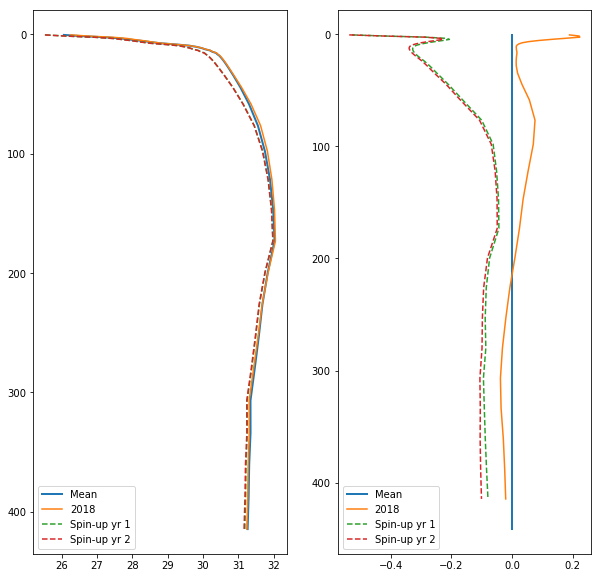

In [146]:
tracer = 'vosaline'
filename = 'grid'
fig, error = profiles(tracer, filename)
fig.savefig(tracer+'_'+month+'_profiles.png')
Differences[month][tracer] = error
print (Differences[month])

{'vosaline': 0.0023962830930071249, 'votemper': 0.30206680476672831}


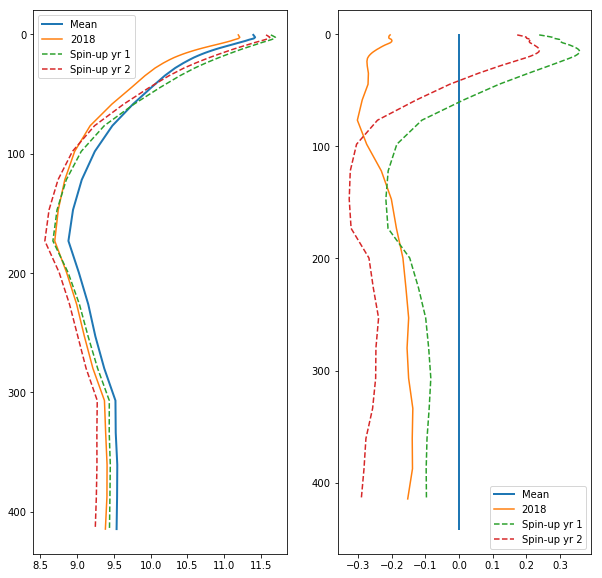

In [147]:
tracer = 'votemper'
filename = 'grid'
fig, error = profiles(tracer, filename)
fig.savefig(tracer+'_'+month+'_profiles.png')
Differences[month][tracer] = error
print (Differences[month])

{'vosaline': 0.0048139157073753686, 'votemper': 0.2664936621648954, 'nitrate': 0.11814057778949562}


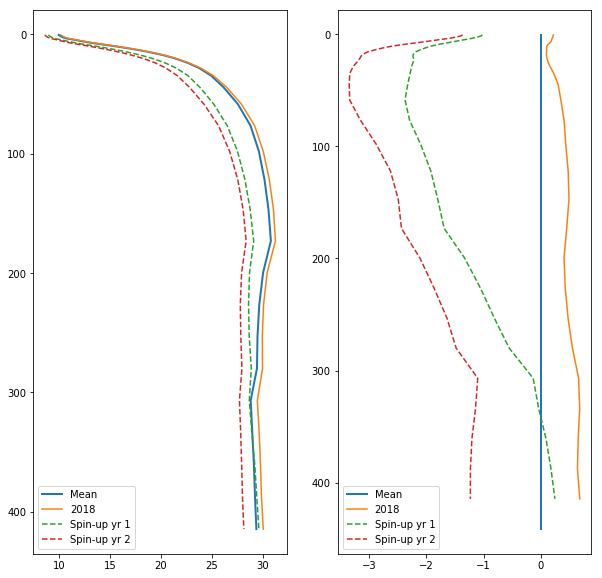

In [133]:
tracer = 'nitrate'
filename = 'ptrc'
fig, error = profiles(tracer, filename)
fig.savefig(tracer+'_'+month+'_profiles.png')
Differences[month][tracer] = error
print (Differences[month])

{'vosaline': 0.0048139157073753686, 'votemper': 0.2664936621648954, 'nitrate': 0.11814057778949562, 'silicon': 0.11503117306090667}


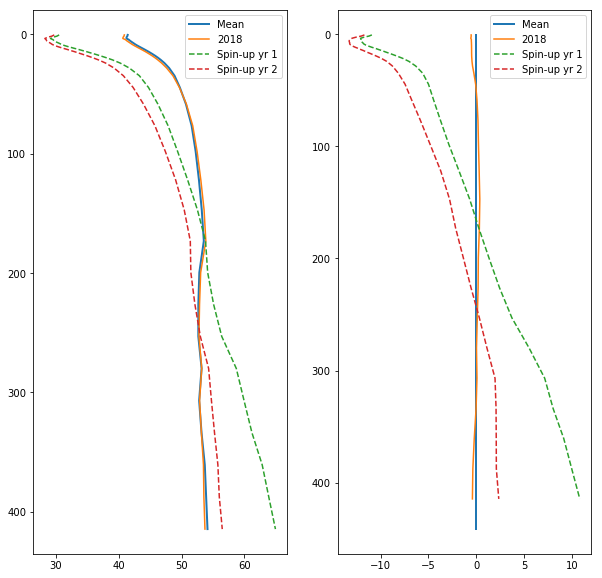

In [134]:
tracer = 'silicon'
filename = 'ptrc'
fig, error = profiles(tracer, filename)
fig.savefig(tracer+'_'+month+'_profiles.png')
Differences[month][tracer] = error
print (Differences[month])

{'vosaline': 0.0048139157073753686, 'votemper': 0.2664936621648954, 'nitrate': 0.11814057778949562, 'silicon': 0.11503117306090667, 'ammonium': 0.099511449129954826}


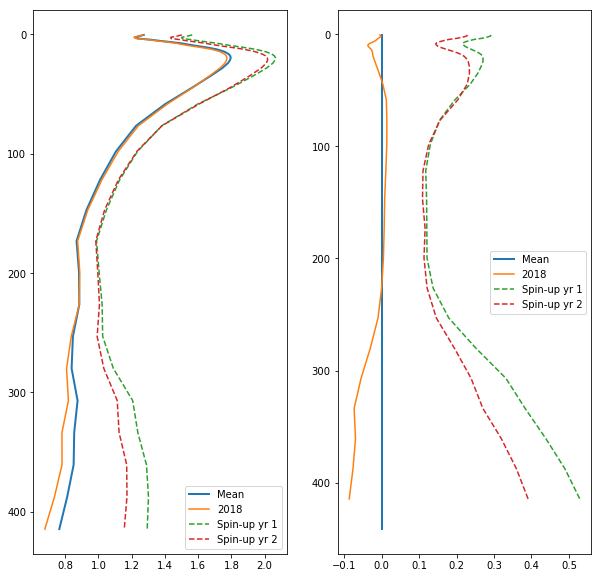

In [135]:
tracer = 'ammonium'
filename = 'ptrc'
fig, error = profiles(tracer, filename)
fig.savefig(tracer+'_'+month+'_profiles.png')
Differences[month][tracer] = error
print (Differences[month])

{'vosaline': 0.0048139157073753686, 'votemper': 0.2664936621648954, 'nitrate': 0.11814057778949562, 'silicon': 0.11503117306090667, 'ammonium': 0.099511449129954826, 'diatoms': 0.017996597132809246}


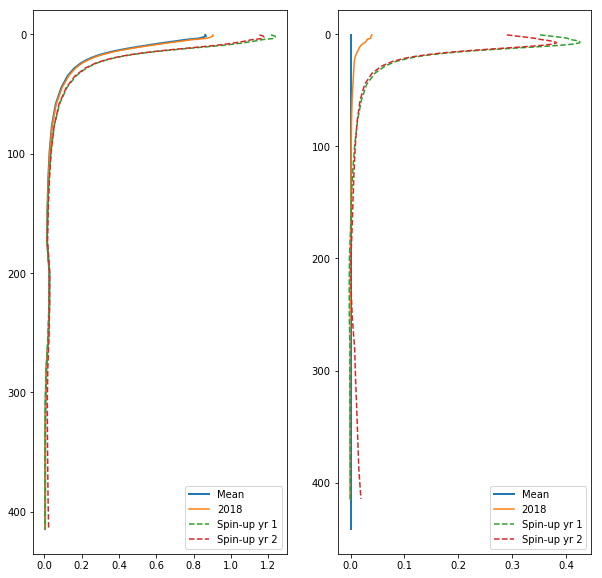

In [136]:
tracer = 'diatoms'
filename = 'ptrc'
fig, error = profiles(tracer, filename)
fig.savefig(tracer+'_'+month+'_profiles.png')
Differences[month][tracer] = error
print (Differences[month])

{'vosaline': 0.0048139157073753686, 'votemper': 0.2664936621648954, 'nitrate': 0.11814057778949562, 'silicon': 0.11503117306090667, 'ammonium': 0.099511449129954826, 'diatoms': 0.017996597132809246, 'flagellates': 0.00077960864592170782}


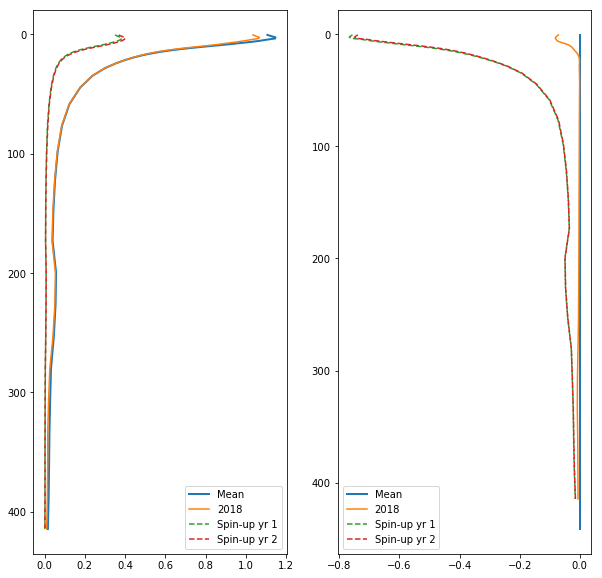

In [137]:
tracer = 'flagellates'
filename = 'ptrc'
fig, error = profiles(tracer, filename)
fig.savefig(tracer+'_'+month+'_profiles.png')
Differences[month][tracer] = error
print (Differences[month])

{'vosaline': 0.0048139157073753686, 'votemper': 0.2664936621648954, 'nitrate': 0.11814057778949562, 'silicon': 0.11503117306090667, 'ammonium': 0.099511449129954826, 'diatoms': 0.017996597132809246, 'flagellates': 0.00077960864592170782, 'dissolved_inorganic_carbon': 0.0020594944050949279}


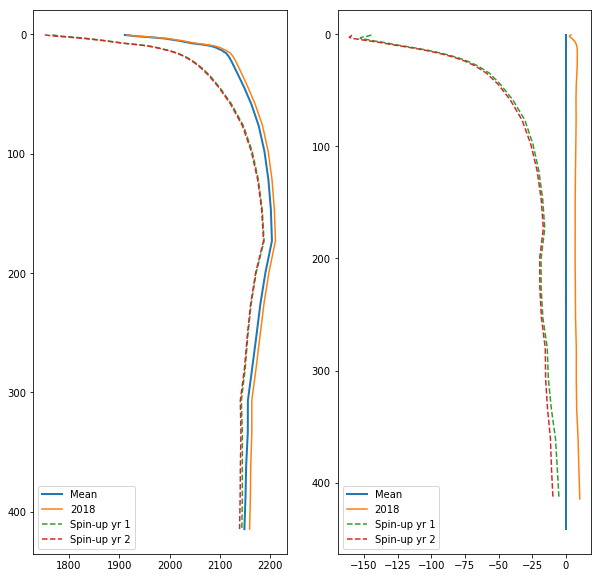

In [138]:
tracer = 'dissolved_inorganic_carbon'
filename = 'carp'
fig, error = profiles(tracer, filename)
fig.savefig(tracer+'_'+month+'_profiles.png')
Differences[month][tracer] = error
print (Differences[month])

{'vosaline': 0.0048139157073753686, 'votemper': 0.2664936621648954, 'nitrate': 0.11814057778949562, 'silicon': 0.11503117306090667, 'ammonium': 0.099511449129954826, 'diatoms': 0.017996597132809246, 'flagellates': 0.00077960864592170782, 'dissolved_inorganic_carbon': 0.0020594944050949279, 'total_alkalinity': 0.52498126922324551}


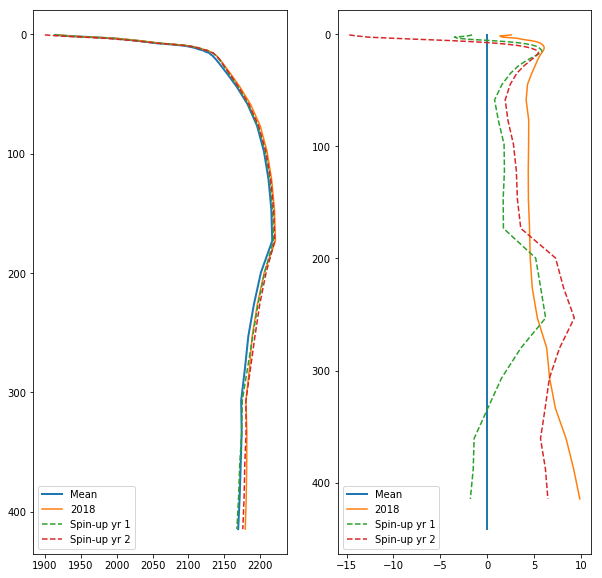

In [139]:
tracer = 'total_alkalinity'
filename = 'carp'
fig, error = profiles(tracer, filename)
fig.savefig(tracer+'_'+month+'_profiles.png')
Differences[month][tracer] = error
print (Differences[month])

{'vosaline': 0.0048139157073753686, 'votemper': 0.2664936621648954, 'nitrate': 0.11814057778949562, 'silicon': 0.11503117306090667, 'ammonium': 0.099511449129954826, 'diatoms': 0.017996597132809246, 'flagellates': 0.00077960864592170782, 'dissolved_inorganic_carbon': 0.0020594944050949279, 'total_alkalinity': 0.52498126922324551, 'Fraser_tracer': 0.152428360022655}


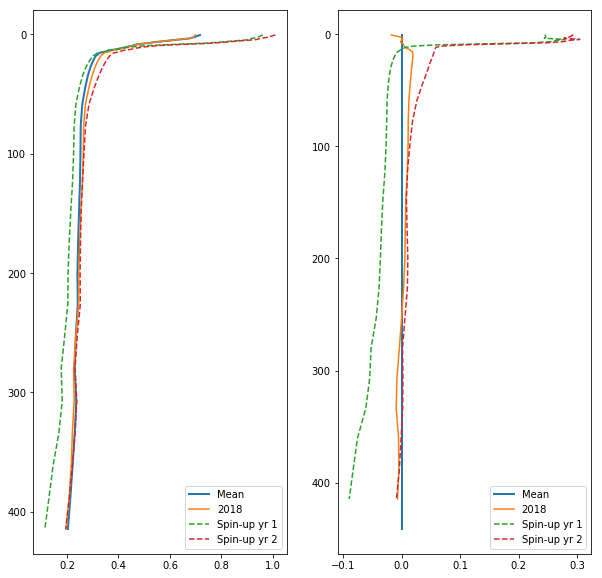

In [140]:
tracer = 'Fraser_tracer'
filename = 'turb'
fig, error = profiles(tracer, filename)
fig.savefig(tracer+'_'+month+'_profiles.png')
Differences[month][tracer] = error
print (Differences[month])

In [141]:
f = open('Differences.yaml', 'w+')
yaml.dump(Differences, f)
f.close()

In [142]:
stream = open('Differences.yaml', 'r')
check_differences = yaml.load(stream)
check_differences

{'apr': {'ammonium': 0.31397458850031129,
  'diatoms': 0.9625099052685826,
  'dissolved_inorganic_carbon': 0.017804953634120459,
  'flagellates': 9.1670363541561175e-06,
  'nitrate': 0.53363151524069607,
  'silicon': 16.095303304605856,
  'total_alkalinity': 0.19113206538669109,
  'vosaline': 0.26226980356418417,
  'votemper': 0.42993363472367441},
 'aug': {'Fraser_tracer': 0.11434473177575213,
  'ammonium': 0.052239955980751443,
  'diatoms': 0.0055091678123060199,
  'dissolved_inorganic_carbon': 0.00192697965340112,
  'flagellates': 0.0001219317924644476,
  'nitrate': 0.39024523337778894,
  'silicon': 0.13994227627045272,
  'total_alkalinity': 0.1746177793899317,
  'vosaline': 0.01097901466009118,
  'votemper': 0.44702971480675258},
 'feb': {'Fraser_tracer': 6.3140546157532391,
  'ammonium': 0.96169178651393805,
  'diatoms': 0.17493419242380576,
  'dissolved_inorganic_carbon': 0.12210589333735575,
  'flagellates': 0.0033921071206443878,
  'nitrate': 3.4797054533008165,
  'silicon': 11

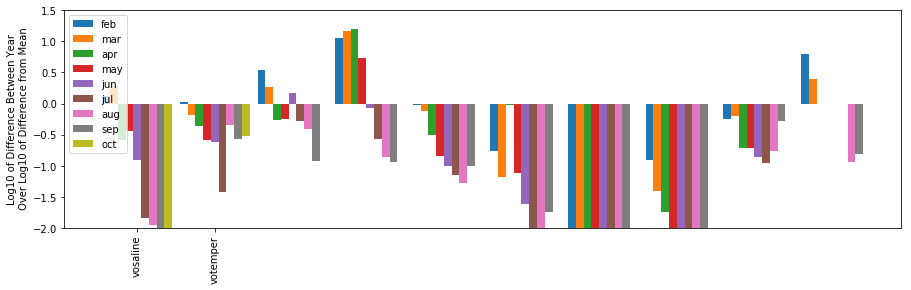

In [148]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
width = 0.1
for month, shift in zip(['feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct'], 
                        [-4, -3, -2, -1, 0, 1, 2, 3, 4]):
    ax.bar(np.arange(len(Differences[month])) + shift*width, np.log10(np.array(list(Differences[month].values()))), 
            width, label=month)
ax.set_xticks(np.arange(len(Differences[month])))
ax.set_xticklabels(list(Differences[month].keys()), rotation='vertical');
ax.set_ylim(-2, 1.5);
ax.set_ylabel('Log10 of Difference Between Year\n Over Log10 of Difference from Mean')
ax.legend(loc='upper left');

In [ ]:
stop

# Thalwegs

In [ ]:
tracer = 'vosaline'
file = 'grid'
cmap = cm.haline
cdiff = cm.balance
vmax = 34
vmin = 20
dvmax = 1
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)
fig.savefig(tracer+'_'+month+'_thalweg.png')

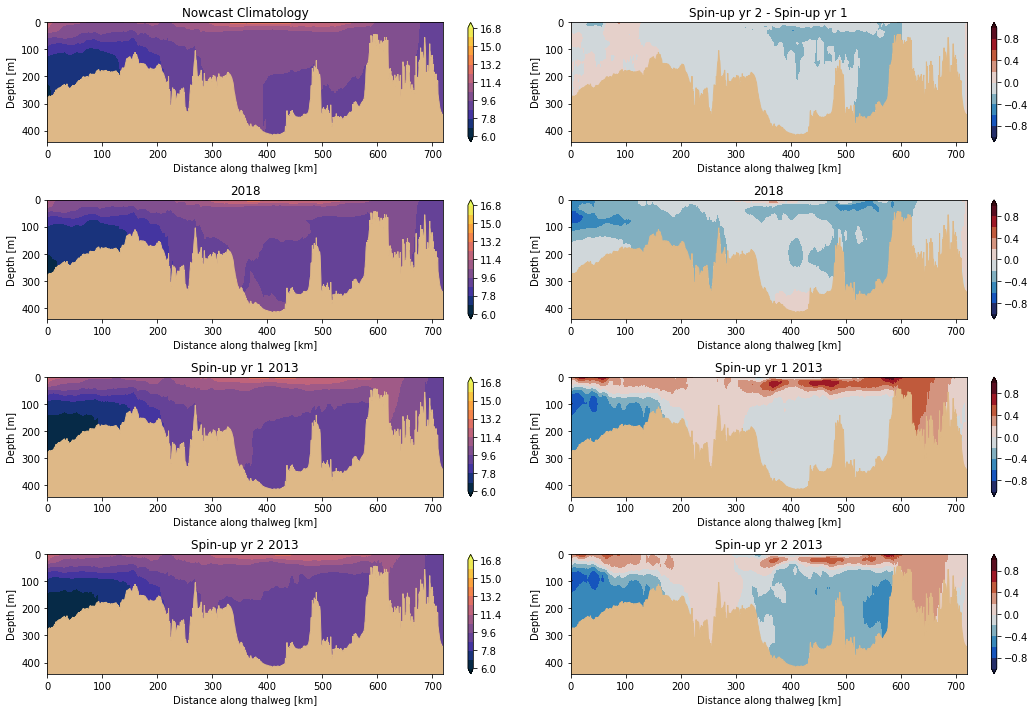

In [152]:
tracer = 'votemper'
filename = 'grid'
cmap = cm.thermal
cdiff = cm.balance
vmax = 15
vmin = 6
dvmax = 1
fig = thalweg_plots(tracer, filename, cmap, cdiff, vmax, vmin, dvmax)
fig.savefig(tracer+'_'+month+'_thalweg.png')

In [ ]:
tracer = 'nitrate'
file = 'ptrc'
#cmap = cm.rain
cmap = cm.speed
cdiff = cm.balance
vmax = 35
vmin = 10
dvmax = 10
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)
fig.savefig(tracer+'_'+month+'_thalweg.png')

In [ ]:
tracer = 'silicon'
file = 'ptrc'
cmap = cm.turbid
cdiff = cm.balance
vmax = 70
vmin = 25
dvmax = 10
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)
fig.savefig(tracer+'_'+month+'_thalweg.png')

In [ ]:
tracer = 'ammonium'
file = 'ptrc'
cmap = cm.speed
cdiff = cm.balance
vmax = 3
vmin = 0
dvmax = 0.5
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)
fig.savefig(tracer+'_'+month+'_thalweg.png')

In [ ]:
tracer = 'diatoms'
file = 'ptrc'
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 0.5
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)
fig.savefig(tracer+'_'+month+'_thalweg.png')

In [ ]:
tracer = 'flagellates'
file = 'ptrc'
cmap = cm.algae
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 0.4
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)
fig.savefig(tracer+'_'+month+'_thalweg.png')

In [ ]:
tracer = 'dissolved_inorganic_carbon'
file = 'carp'
#cmap = 'cividis_r'
cmap = 'bone'
cdiff = cm.balance
vmax = 2200
vmin = 1800
dvmax = 100
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)
fig.savefig(tracer+'_'+month+'_thalweg.png')

In [ ]:
tracer = 'total_alkalinity'
file = 'carp'
cmap = cm.ice_r
cdiff = cm.balance
vmax = 1940
vmin = 1900
dvmax = 100
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)
fig.savefig(tracer+'_'+month+'_thalweg.png')

In [ ]:
tracer = 'Fraser_tracer'
file = 'turb'
cmap = cm.turbid
cdiff = cm.balance
vmax = 2
vmin = 0
dvmax = 0.2
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)
fig.savefig(tracer+'_'+month+'_thalweg.png')

In [ ]:
stop

# redo DIC/Alkalinity Plots

In [ ]:
my_months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
            'jul', 'aug', 'sep', 'oct', 'nov']
my_imonths = ['01', '02','03', '04','05','06',
             '07','08','09','10','11']

In [ ]:
for month, imonth in zip(my_months, my_imonths):
    print (month, imonth)
    #1
    tracer = 'dissolved_inorganic_carbon'
    file = 'carp'
    cmap = 'cividis_r'
    cdiff = cm.balance
    vmax = 2300
    vmin = 1900
    dvmax = 100
    fig = surface_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)
    fig.savefig(tracer+'_'+month+'_surface.png')
    #2
    tracer = 'total_alkalinity'
    file = 'carp'
    cmap = cm.ice_r
    cmap.set_bad('#8b7765')
    cdiff = cm.balance
    vmax = 2300
    vmin = 1900
    dvmax = 100
    fig = surface_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)
    fig.savefig(tracer+'_'+month+'_surface.png')
    # 3
    tracer = 'dissolved_inorganic_carbon'
    file = 'carp'
    cmap = 'cividis_r'
    cdiff = cm.balance
    vmax = 2200
    vmin = 1800
    dvmax = 100
    fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)
    fig.savefig(tracer+'_'+month+'_thalweg.png')
    # 4
    tracer = 'total_alkalinity'
    file = 'carp'
    cmap = cm.ice_r
    cdiff = cm.balance
    vmax = 1940
    vmin = 1900
    dvmax = 100
    fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)
    fig.savefig(tracer+'_'+month+'_thalweg.png')

In [ ]:
np.log(np.array(list(Differences['aug'].values())))